In [76]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def align(a, b):
    b_matrix = np.empty((len(b), *np.shape(b)), dtype=float)
    
    for i in range(len(a)):
        for j in range(len(b)):
            rot, _ = R.align_vectors(a[i], b[j])
            b_matrix[i][j] = rot.apply(b[j])
            
    return a, b_matrix
        
        

def rmsd(a, b):
    
    if a.ndim < 2 or b.ndim < 2:
        raise ValueError('Input arrays must be at least 2D')
    
    if a.ndim > 3 or b.ndim > 3:
        raise ValueError('Input arrays must be at most 3D')
    
    if a.ndim == 3 and b.ndim == 2:
        a,b = b,a
    
    if a.ndim == 2:
        a = np.expand_dims(a, axis=0)
        
    if b.ndim == 2:
        b = np.expand_dims(b, axis=0)
    
    a,b = align(a,b)
    
    return np.array([[np.sqrt(np.mean((a[i] - b[i][j])**2)) for j in range(len(b))] for i in range(len(a))]).squeeze()

In [77]:
from PQAnalysis.io import read_trajectory

start_frame = read_trajectory('start_frame.xyz')[0]
end_frame = read_trajectory('end_frame.xyz')[0]
traj = read_trajectory('traj.xyz')

rmsd_scalar = rmsd(start_frame.pos, end_frame.pos)
rmsd_1d = rmsd(start_frame.pos, traj.pos)
rmsd_2d = rmsd(traj.pos, traj.pos)

100%|██████████| 1/1 [00:00<00:00, 86.50it/s]


100%|██████████| 101/101 [00:00<00:00, 201.04it/s]


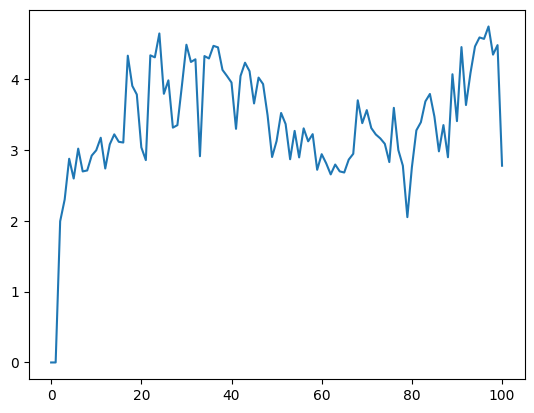

In [79]:
import matplotlib.pyplot as plt

plt.plot(rmsd_1d)
plt.show()

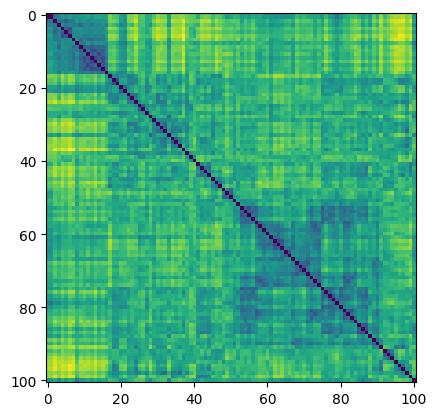

In [80]:
plt.imshow(rmsd_2d)
plt.show()